In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm

import seaborn as sns
import warnings

import re
from scipy import stats

from scipy.stats import chi2_contingency, f_oneway
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split as train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_auc_score, cohen_kappa_score

from sklearn.model_selection import cross_val_score as cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.feature_selection import RFE as recurssive_feature_elimination

from sklearn.pipeline import Pipeline

from sklearn.compose import make_column_selector as selector

from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBClassifier, plot_importance

from sklearn import svm

In [ ]:
from sklearn.impute?

Object `sklearn.impute` not found.


In [ ]:
# Read The CSV File.

df = pd.read_csv('/content/adult.csv')
df.drop(columns = ['fnlwgt', 'education.num'], inplace = True)

df.rename(columns = {'marital.status' : 'marital_status', 'capital.gain': 'capital_gain',
                    'capital.loss' : 'capital_loss', 'hours.per.week' : 'hours_per_week',
                    'native.country' : 'native_country'},
                     inplace = True)

target_encoder = {'<=50K' : 0, '>50K' : 1, np.nan : 2}

df['income'] = df['income'].apply(lambda x : target_encoder[x])
df = df.replace('?', np.nan)

df = df[df.income != 2]

df.head(5)

,age,workclass,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,90,NaN,HS-grad,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,NaN,Some-college,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0


In [ ]:
df.columns

Index(['age', 'workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
       'hours_per_week', 'native_country', 'income'],
      dtype='object')

In [ ]:
df['income'].value_counts()

0    24720
1     7841
Name: income, dtype: int64

In [ ]:
df.dtypes

age                int64
workclass         object
education         object
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income             int64
dtype: object

In [ ]:
df['income'] = df['income'].astype('uint8')
df.dtypes

age                int64
workclass         object
education         object
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income             uint8
dtype: object

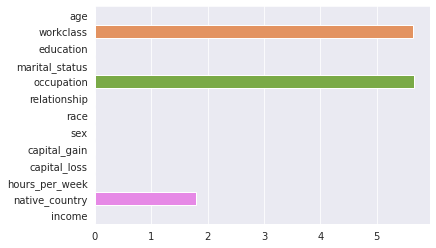

In [ ]:
#Missing Value Percentage Calculator
sns.set_style("darkgrid")

data = {}

for col_name in df.columns:

  percentage_missing =  (df[col_name].isnull().sum()*100)/len(df)

  data[col_name] = percentage_missing


sns.barplot(x = list(data.values()), 
            y = list(data.keys()))

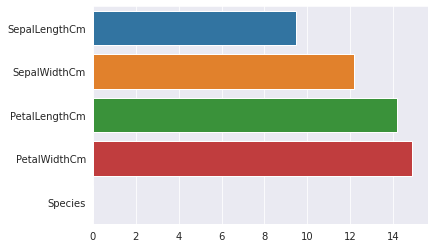

In [ ]:
df_Iris = pd.read_csv('/content/Iris_Missing.csv')

data = {}

for col_name in df_Iris.columns:

  percentage_missing =  (df_Iris[col_name].isnull().sum()*100)/len(df_Iris)

  data[col_name] = percentage_missing


sns.barplot(x = list(data.values()), 
            y = list(data.keys()))

**KNN Imputer.**

-----Imputing Missing Value by KNN algorithm with Varrying K; then finding the best value of K.

  0%|          | 0/7 [00:00<?, ?it/s]

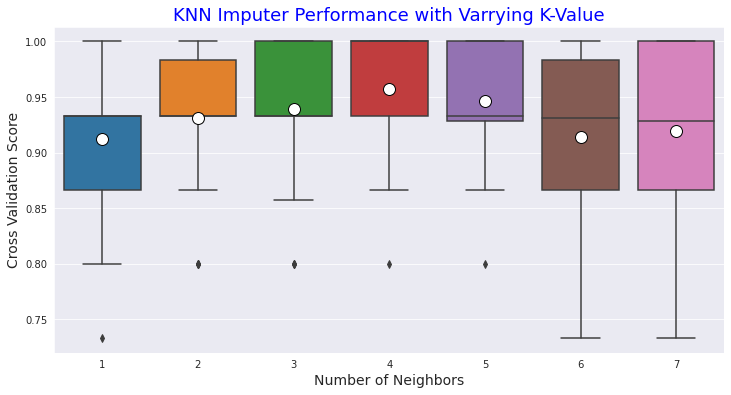

In [ ]:
x, y = df_Iris.iloc[:, :-1].values, df_Iris.iloc[:, -1].values

num_of_Neighbor = []
score = []
score_dictionary = {}
k_fold = 10
repeat = 3

num_neighbor = [i for i in range(1, 8)]

for k in tqdm(num_neighbor, colour = 'Red'):

  pipeline = Pipeline(steps=[('imputer', KNNImputer(n_neighbors = k)), 
                             ('model', DecisionTreeClassifier(random_state = 42))])
  
  #We can Use other model also for evaluation such as xgb.XGBClassifier(random_state = 42) in the pipeline.
  
  cross_validation = RepeatedStratifiedKFold(n_splits = k_fold, n_repeats = repeat, random_state = 9)

  cross_validation_result = cross_val_score(pipeline, x, y, scoring = 'accuracy', 
                                           cv = cross_validation, n_jobs = -1)
  
  num_of_Neighbor.extend([k] * k_fold * repeat)
  score.extend(cross_validation_result)


score_df =  pd.DataFrame({'K_Value' : num_of_Neighbor, 'Cross_Validation_Score' : score})

plt.figure(figsize=(12,6))
sns.boxplot(data = score_df, x = "K_Value", y = "Cross_Validation_Score",
            showmeans=True,
            meanprops = {"marker" : "o",
                         "markerfacecolor" : "white", 
                         "markeredgecolor" : "black",
                         "markersize" : "12"
                         })


plt.ylabel("Cross Validation Score", size=14)
plt.xlabel("Number of Neighbors", size=14)
plt.title("KNN Imputer Performance with Varrying K-Value", color = 'Blue', size=18);

In [ ]:
pipeline = Pipeline(steps=[('imputer', KNNImputer(n_neighbors = 4)), 
                             ('model', DecisionTreeClassifier(random_state = 42))])

"""new_data1 and new_data2 are not in the file. We deleted them."""

new_data1 = [6.6, 3.0, np.nan, 1.4]  
#True Class is Iris-versicolor; row 77

new_data2 = [np.nan, np.nan, 5.4, 2.3]
#True Class is Iris-virginica; row 150

pipeline.fit(x, y)

y_pred1 = pipeline.predict([new_data1])
y_pred2 = pipeline.predict([new_data2])

print("Predicted Class for new_data1 is: {}".format(y_pred1[0]))
print("Predicted Class for new_data2 is: {}".format(y_pred2[0]))

Predicted Class for new_data1 is: Iris-versicolor
Predicted Class for new_data2 is: Iris-virginica


>> **Selecting Best Feature Using F-Score from XGBoost Model.**

--What is F-Score?: https://www.csie.ntu.edu.tw/~cjlin/papers/features.pdf

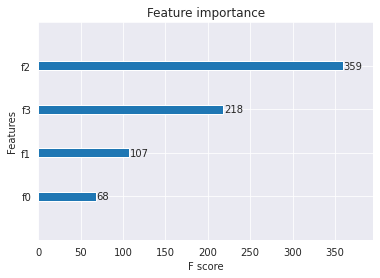

In [ ]:
x, y = df_Iris.iloc[:, :-1], df_Iris.iloc[:, -1]

feature_name = list(df_Iris.columns.values)[:-1]
pipeline = Pipeline(steps=[('imputer', KNNImputer(n_neighbors = 4)), 
                           ('model', XGBClassifier(random_state = 42))])
  
pipeline.fit(x, y)

"""What is F-Score?: https://www.csie.ntu.edu.tw/~cjlin/papers/features.pdf"""

plot_importance(pipeline.named_steps["model"])
plt.show()

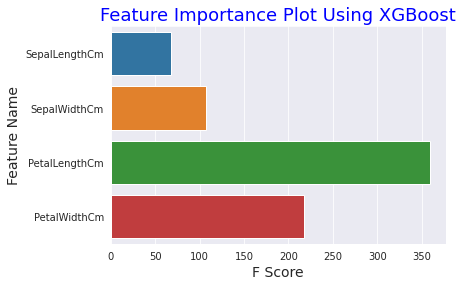

In [ ]:
d = pipeline.named_steps["model"].get_booster().get_fscore()
d_sorted = dict(sorted(d.items()))

k, v = list(d_sorted.keys()), list(d_sorted.values())

fg = sns.barplot(x = v, y = feature_name)

plt.xlabel("F Score", size=14)
plt.ylabel("Feature Name", size=14)
plt.title("Feature Importance Plot Using XGBoost", color = 'Blue', size=18);

In [ ]:
d = pipeline.named_steps["model"].get_booster().get_fscore()

"""Sorting a Dictionary by it's value. For descending order set reverse = True"""
FVal_dict_sorted = dict(sorted(d.items(), key = lambda _tuple_: _tuple_[1], reverse = False))

cols = [k for k in FVal_dict_sorted.keys()]
col_idx = []

"""Columns are named as F0, F5 etc., i.e., 0th column, 5th column. We are extracting the Index Values."""
for col_name in cols:
  col_idx.extend([int(s) for s in re.findall(r'\d+', col_name)])

print(FVal_dict_sorted)
print(col_idx)

{'f0': 68, 'f1': 107, 'f3': 218, 'f2': 359}
[0, 1, 3, 2]


>> **Selecting the Best Features**

  0%|          | 0/4 [00:00<?, ?it/s]

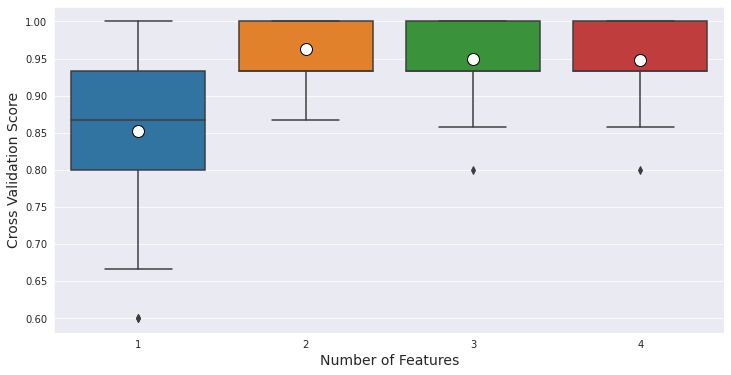

In [ ]:
k = 10
repeat = 5
scoring_metric = 'accuracy'
model = svm.SVC(kernel = 'linear')

evaluation_score, number_of_features, Feature_Name = list(), list(), list()

for i in tqdm(range(0, len(col_idx)), colour = 'black'):

  """col_idx slicing happens inside DataFrame Slicing."""
  features = df_Iris.iloc[:, col_idx[0+i :]]
  target = df_Iris.iloc[:, -1]

  model_pipeline = Pipeline(steps=[('imputer', KNNImputer(n_neighbors = 4)),
                                   ('standardization', StandardScaler()), 
                                   ('model', model)
                                  ])

  cross_validation_strategy = RepeatedStratifiedKFold(n_splits = k,
                                                      n_repeats = repeat,
                                                      random_state = 42)
  
  cross_validation_score = cross_val_score(model_pipeline, 
                                           features,
                                           target,
                                           scoring = scoring_metric,
                                           cv = cross_validation_strategy)
  
  evaluation_score.extend(cross_validation_score)
  number_of_features.extend([len(col_idx) - i] * len(cross_validation_score))
  Feature_Name.extend([df_Iris.iloc[:, col_idx[0+i : ]].columns.values] * len(cross_validation_score))
  

cross_val_df = pd.DataFrame({'Number_of_Features' : number_of_features,
                             'evaluation_score' : evaluation_score,
                             'Feature_Used' : Feature_Name
                            }
                            )

plt.figure(figsize=(12,6))

sns.boxplot(
            x = 'Number_of_Features',
            y = 'evaluation_score',
            data = cross_val_df,
            showmeans = True,
            meanprops = {"marker" : "o",
                         "markerfacecolor" : "white", 
                         "markeredgecolor" : "black",
                         "markersize" : "12"
                         }
            )

plt.ylabel("Cross Validation Score", size=14)
plt.xlabel("Number of Features", size=14);

In [ ]:
"""Which Features were selected?"""

#Select the value of n_features from above plot.

n_features = 2
feature_used = cross_val_df[cross_val_df['Number_of_Features'] == n_features][['Feature_Used']]
feature_used.reset_index(drop = True, inplace = True)
print(feature_used.loc[0,'Feature_Used'])

['PetalWidthCm' 'PetalLengthCm']


>>> **Selecting Best Features Using Recurssive Feature Elimination**

  0%|          | 0/4 [00:00<?, ?it/s]

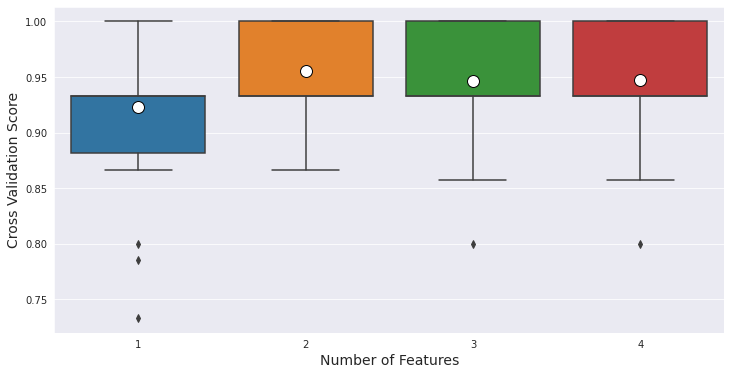

In [ ]:
"""Read more here: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html"""

k = 10
repeat = 5
scoring_metric = 'accuracy'
n_features = len(list(df_Iris.columns.values)) - 1


features = df_Iris.iloc[:, :-1]
target = df_Iris.iloc[:, -1]

estimator = svm.SVC(kernel = 'linear')
model = svm.SVC(kernel = 'linear')

evaluation_score, number_of_features, Feature_Name = list(), list(), list()

def make_model_pipeline():

  model_dictionary = {}

  for n in range(1, n_features + 1):

    rfe = recurssive_feature_elimination(estimator = estimator, 
                                         n_features_to_select = n)
    
    evaluator_model = model

    model_pipeline = Pipeline(steps = [('imputer', KNNImputer(n_neighbors = 4)),
                                       ('standardizer', StandardScaler()),
                                       ('selector', rfe),                                        
                                       ('evaluator', evaluator_model)
                                       ])

    model_dictionary[str(n)] = model_pipeline

  return model_dictionary


model = make_model_pipeline()

for model_name in tqdm(model.keys(), colour = 'Blue'):

  cross_validation_strategy = RepeatedStratifiedKFold(n_splits = k,
                                                      n_repeats = repeat,
                                                      random_state = 42)
  
  cross_validation_score = cross_val_score(model[model_name], 
                                           features,
                                           target,
                                           scoring = scoring_metric,
                                           cv = cross_validation_strategy)
  
  evaluation_score.extend(cross_validation_score)
  number_of_features.extend([int(model_name)] * len(cross_validation_score))


cross_val_df = pd.DataFrame({'Number_of_Features' : number_of_features,
                             'evaluation_score' : evaluation_score,
                            })

plt.figure(figsize=(12,6))

sns.boxplot(
            x = 'Number_of_Features',
            y = 'evaluation_score',
            data = cross_val_df,
            showmeans = True,
            meanprops = {"marker" : "o",
                         "markerfacecolor" : "white", 
                         "markeredgecolor" : "black",
                         "markersize" : "12"
                         }
            )

plt.ylabel("Cross Validation Score", size=14)
plt.xlabel("Number of Features", size=14);

In [ ]:
feature_list = list(df_Iris.columns.values)
feature_list.remove('Species')

imputer =  KNNImputer(n_neighbors = 4)

rfe = recurssive_feature_elimination(estimator = estimator,
                                     n_features_to_select = 2)

imputed_features = imputer.fit_transform(features)
rfe.fit(imputed_features, target)

for n in range(len(feature_list)):
	print('Feature: {}, Selected : {}, Rank: {}'.format(feature_list[n], rfe.support_[n], rfe.ranking_[n]))

Feature: SepalLengthCm, Selected : False, Rank: 3
Feature: SepalWidthCm, Selected : False, Rank: 2
Feature: PetalLengthCm, Selected : True, Rank: 1
Feature: PetalWidthCm, Selected : True, Rank: 1


>>>**Comparison Between Different Imputation Techniques**

  0%|          | 0/11 [00:00<?, ?it/s]

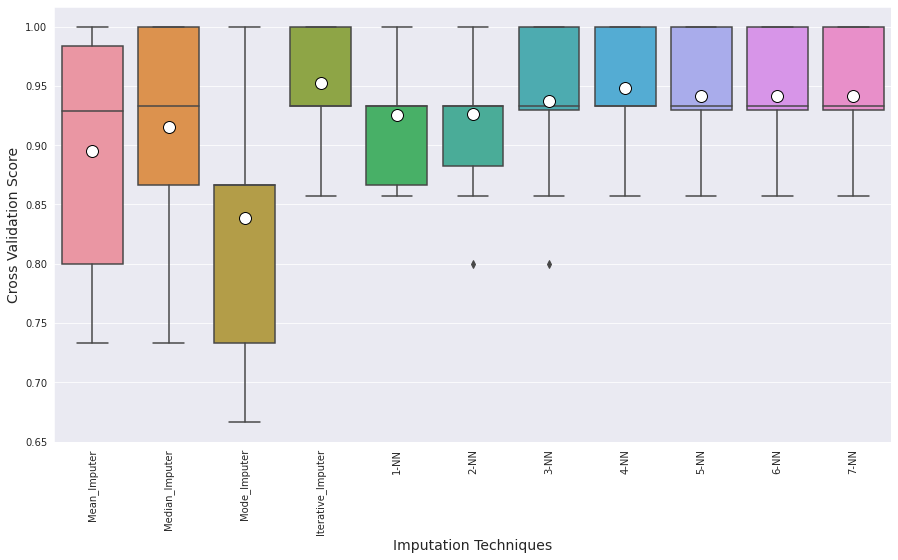

In [ ]:
model = svm.SVC(kernel = 'linear')

k_fold = 10
repeat = 3
Imputation_Technique, score = [], []

imputation_method = {
                     "Mean_Imputer" :       SimpleImputer(strategy = 'mean'),
                     "Median_Imputer" :     SimpleImputer(strategy = 'median'),
                     "Mode_Imputer" :       SimpleImputer(strategy = 'most_frequent'),
                     "Iterative_Imputer" :  IterativeImputer()
                     }

for n in range(1, 8):
  imputation_method[str(n) + '-NN'] = KNNImputer(n_neighbors = n)

for imputer_name, imputer in tqdm(imputation_method.items(), colour = 'Yellow'):

  model_pipeline = Pipeline(steps=[('imputer', imputer),
                                   ('standardizer', StandardScaler()),
                                   ('model', model)
                                   ])

  cross_validation = RepeatedStratifiedKFold(n_splits = k_fold,
                                             n_repeats = repeat, 
                                             random_state = 42
                                             )

  cross_validation_result = cross_val_score(model_pipeline,
                                            x, y, 
                                            scoring = 'accuracy', 
                                            cv = cross_validation,
                                            n_jobs = -1
                                            )
  
  Imputation_Technique.extend([imputer_name] * k_fold * repeat)
  score.extend(cross_validation_result)


score_df =  pd.DataFrame({'Imputation_Technique' : Imputation_Technique,
                          'Cross_Validation_Score' : score
                          })

plt.figure(figsize=(15,8))

sns.boxplot(data = score_df,
            x = "Imputation_Technique",
            y = "Cross_Validation_Score",
            showmeans=True,
            meanprops = {"marker" : "o",
                         "markerfacecolor" : "white", 
                         "markeredgecolor" : "black",
                         "markersize" : "12"
                         })

plt.xticks(rotation = 90)
plt.ylabel("Cross Validation Score", size=14)
plt.xlabel("Imputation Techniques", size=14);